In [3]:
import h5netcdf
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import csv
import scipy.interpolate as ip
import scipy.signal as sn
import os
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re
import cartopy.crs as ccrs
import cartopy.util as cutil
import xarray as xr
from matplotlib import animation
from matplotlib import cm

import string
import matplotlib.colors as mcolors
import matplotlib.backends.backend_pdf
from matplotlib import rc
import matplotlib.dates as mdates

rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size'   : 10})
rc('text', usetex=True)

rundir = '../../actual_runs/runs_4_degree_last/'
time = np.arange(0,70,5)
print(rundir)
def newColor(start, end, N=50):
    vals = np.ones((N, 4))
    vals[:,0] = np.linspace(start[0],end[0],N)
    vals[:,1] = np.linspace(start[1],end[1],N)
    vals[:,2] = np.linspace(start[2],end[2],N)
    return vals

#first
c1 = newColor((1,1,1), (0.5,0,1))
c2 = newColor((0.5,0,1), (0,0,0.75))

#second
c3 = newColor((0,1,1), (0,0.5,1),25)
c4 = newColor((0,0.5,1), (0,0.25,0.5),25)

#third
c5 = newColor((0.5,1,0.75), (0.25, 0.5,0))
c6 = newColor((0.25, 0.5,0), (1,1,0))

#fourth
c7 = newColor((1,0.5,0), (0.75, 0,0))
c8 = newColor((0.75, 0,0), (1,0.75,0.25))

# combine them and build a new colormap
colors = np.vstack((c3,c4,c1,c2,c5,c6,c7,c8))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors, N=100)

yearsdone = []
ranfory = []
BSF = []
MOC = []
SSS = []
area_u = []
area_v = []
TEMP = []
u = []
v = []
xt = []
yt = []
zt = []
dzt = []
dyt = []
dxt = []
dyu = []

for year in time:
    if os.path.exists(rundir + 'Run%i/run_%ima.current_run' % (year,year)):
        with open(rundir + 'Run%i/run_%ima.current_run' % (year,year)) as f:
            ranfor = int(f.readline())
        ranfory.append(ranfor)
        yearsdone.append(year)
        with xr.open_dataset(rundir + 'Run%i/run_%ima.%04d.averages.nc'% (year,year,ranfor-1)) as ds:
            BSF.append((ds['psi'].values)[0])
            TEMP.append((ds['temp'].values)[0])
            SSS.append((ds['salt'].values)[0])
            u.append((ds['u'].values)[0])
            v.append((ds['v'].values)[0])
            if xt == []:
                xt = ds['xt'].values
                yt = ds['yt'].values
                zt = ds['zt'].values
        with xr.open_dataset(rundir + 'Run%i/run_%ima.%04d.overturning.nc'% (year,year,ranfor-1)) as ds:
            MOC.append(-(ds['vsf_depth'].values)[0] - (ds['bolus_depth'].values)[0])
        with xr.open_dataset(rundir + 'Run%i/run_%ima.%04d.snapshot.nc'% (year,year,ranfor -1)) as ds:
            area_u.append(ds['area_u'].values)
            area_v.append(ds['area_v'].values)
            if dzt == []:
                dzt = ds['dzt'].values
                dyt = ds['dyt'].values
                dxt = ds['dxt'].values
                dyu = ds['dyu'].values
print(ranfory)
#5 15 65

../../actual_runs/runs_4_degree_last/
[495, 426, 490, 414, 490, 490, 490, 490, 490, 490, 490, 490, 490, 397]


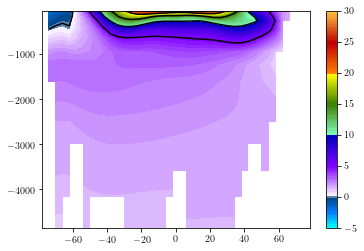

In [13]:
# get the temp and salinity for each
xt_shaped = np.array(xt) - 360
actualxt = xt_shaped == -26.

plotT = TEMP[0][:,:,actualxt][:,:,0]

cs = plt.contourf(yt,zt,plotT,cmap=mymap,levels=np.arange(-5,30.1,0.1),corner_mask=False)
plt.contour(yt,zt,plotT,colors='k',levels=np.arange(-5,30.1,5),corner_mask=False)
plt.colorbar(cs,ticks=[-5,0,5,10,15,20,25,30])
plt.show()